In [172]:
import pandas as pd # -> Module yang digunaakn untuk analisis data, editing dataframe
import numpy as np # -> Module yang digunakan untuk operasi matematika
import matplotlib.pyplot as plt # -> Module yang digunakan untuk melakukan visualisasi data
import seaborn as sns # -> Module yang digunakan untuk melakukan visualisasi data
import os # -> Untuk melakukan operasi sistem di google colab

In [173]:
# Ubah ke direktori input dataset di Kaggle
os.chdir('/kaggle/input/the-movies-dataset')

# Verifikasi perubahan direktori
print("Current Directory:", os.getcwd())

# Loop untuk menampilkan semua file dalam direktori
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Current Directory: /kaggle/input/the-movies-dataset
./ratings.csv
./links_small.csv
./credits.csv
./keywords.csv
./movies_metadata.csv
./ratings_small.csv
./links.csv


In [174]:
os.listdir()

['ratings.csv',
 'links_small.csv',
 'credits.csv',
 'keywords.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'links.csv']

In [175]:
movies_data = pd.read_csv('movies_metadata.csv', low_memory=False)

In [176]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [177]:
movies_data.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28762,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,75028,tt0479000,pt,The Coconut Revolution,The movie tells the story of the successful up...,...,2000-12-31,0.0,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Coconut Revolution,False,0.0,0.0
15464,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,8471,tt0860866,en,Far North,A soldier's unexpected arrival affects two wom...,...,2007-08-30,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Far North,False,6.0,20.0
26425,False,"{'id': 91657, 'name': 'Disney Buddies Collecti...",9000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,9973,tt0470982,en,Air Buddies,Here’s the delightful tale of teamwork and adv...,...,2006-12-12,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They Shoot. They Score. They TALK!,Air Buddies,False,5.5,50.0
7629,False,"{'id': 192532, 'name': 'Dead or Alive Collecti...",0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,11315,tt0221111,ja,DEAD OR ALIVE 犯罪者,Ryūichi and his small gang of Triad vie for co...,...,1999-11-27,0.0,105.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Dead or Alive,False,6.4,34.0
27985,False,NaN,0,[],NaN,199198,tt0049282,en,Guendalina,Wealthy teenager Guendalina (Jacqueline Sassar...,...,1957-08-03,0.0,103.0,[],Released,NaN,Guendalina,False,5.0,1.0
20073,False,NaN,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,121826,tt1441951,en,Quartet,"The directorial debut of Dustin Hoffman, Quart...",...,2012-09-08,59520298.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Four Friends Looking For A Little Harmony,Quartet,False,6.4,141.0
27558,False,NaN,0,"[{'id': 16, 'name': 'Animation'}]",NaN,168202,tt0241399,en,Yego zhena kuritsa,Extraordinarily detailed and beautifully drawn...,...,1990-05-01,0.0,13.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,"Hen, His Wife",False,7.5,2.0
7005,False,NaN,16500000,"[{'id': 18, 'name': 'Drama'}]",NaN,11093,tt0315983,en,House of Sand and Fog,"Behrani, an Iranian immigrant buys a Californi...",...,2003-12-19,16942795.0,126.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Some dreams can't be shared.,House of Sand and Fog,False,7.0,202.0
33688,False,NaN,0,"[{'id': 28, 'name': 'Action'}]",NaN,32229,tt0440067,cn,Bau lit do see,A young Japanese woman has been trained to bec...,...,2004-01-01,0.0,99.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,NaN,Explosive City,False,6.4,7.0
14391,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,82040,tt0345672,en,Most,A poetic and powerful story of a father forced...,...,2003-06-11,0.0,29.0,"[{'iso_639_1': 'cs', 'name': 'Český'}]",Released,NaN,Most,False,7.3,8.0


In [178]:
movies_data["release_date"] = pd.to_datetime(movies_data["release_date"], errors='coerce')

In [179]:
movies_data["release_date"].dtypes

dtype('<M8[ns]')

In [180]:
movies_data["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [181]:
movies_data["original_language"].nunique()

92

In [182]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45466 non-null  object        
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  object        
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45461 non-null  object        
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [183]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [184]:
movies_data["budget"] = pd.to_numeric(movies_data["budget"], errors="coerce")
movies_data["revenue"] = pd.to_numeric(movies_data["revenue"], errors="coerce")

movies_data["profit"] = movies_data["revenue"] - movies_data["budget"]

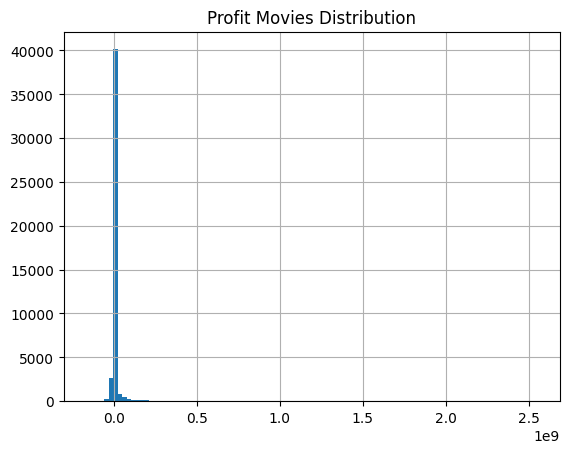

In [185]:
movies_data["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [186]:
movies_data["profit"].describe()

count    4.546000e+04
mean     6.984491e+06
std      5.214125e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

<Axes: >

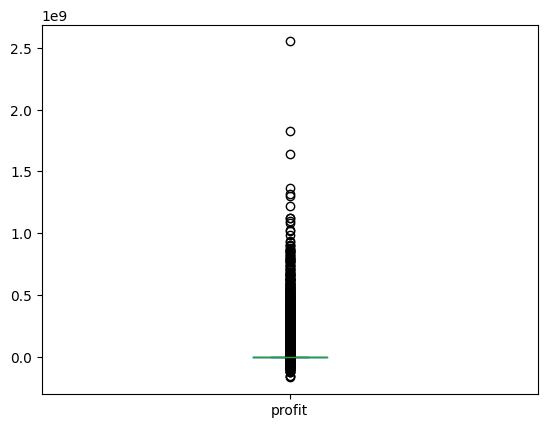

In [187]:
movies_data["profit"].plot(kind = "box")

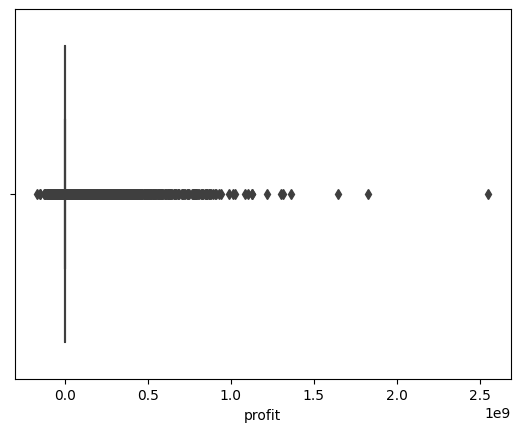

In [188]:
import seaborn as sns
sns.boxplot(data = movies_data, x = "profit")
plt.show()

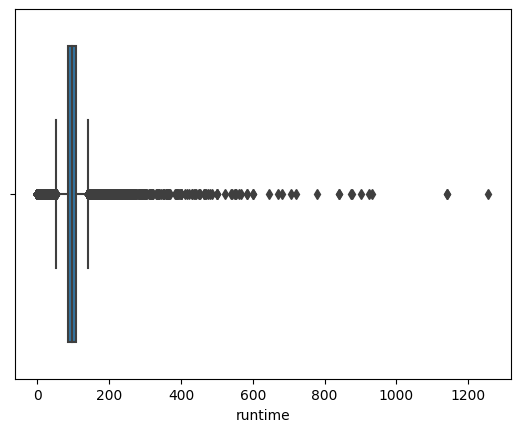

In [189]:
sns.boxplot(data = movies_data, x = "runtime")
plt.show()

In [190]:
#Persentil ke-90 dari profit, yaitu nilai di mana 90% film memiliki profit di bawahnya dan 10% di atasnya. Digunakan untuk menganalisis outlier dan distribusi profit.
movies_data["profit"].quantile(0.9)

1578210.8999999824

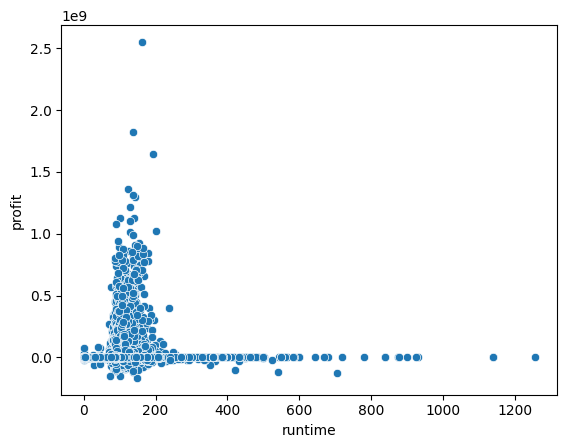

In [191]:
sns.scatterplot(data = movies_data,
                x = "runtime",
                y = "profit")
plt.show()

In [192]:
#Memuat Dataset
rating = pd.read_csv('ratings.csv')

In [194]:
print(rating.head())

   userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556


In [195]:
#Pratinjau dan Pembersihan Data
rating = rating.dropna()
movies_data = movies_data.dropna(subset=['genres'])

In [196]:
#Ekstraksi Genre Pertama
import ast

def extract_first_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]['name']
    except (ValueError, SyntaxError):
        pass
    return None

movies_data['first_genre'] = movies_data['genres'].apply(extract_first_genre)

In [197]:
genre_counts = movies_data['first_genre'].value_counts()
print(genre_counts)

first_genre
Drama                   11966
Comedy                   8820
Action                   4489
Documentary              3415
Horror                   2619
Crime                    1685
Thriller                 1665
Adventure                1514
Romance                  1191
Animation                1124
Fantasy                   704
Science Fiction           647
Mystery                   554
Family                    524
Music                     487
Western                   451
TV Movie                  390
War                       379
History                   279
Foreign                   118
Carousel Productions        1
Aniplex                     1
Odyssey Media               1
Name: count, dtype: int64


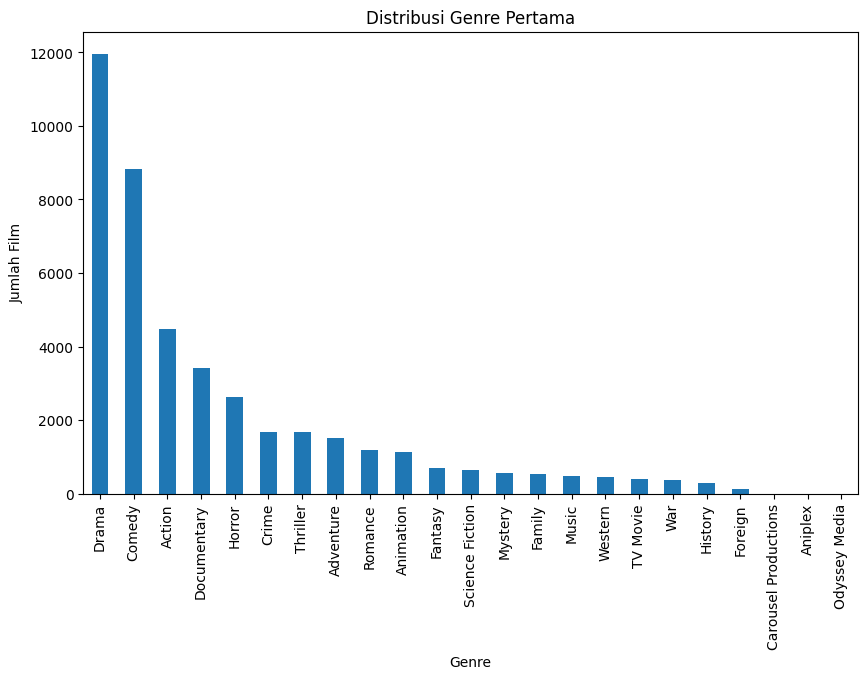

In [198]:
# Analisis Data Eksplorasi (EDA) pada Genre
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Distribusi Genre Pertama')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.show()

In [200]:
# Daftar genre yang valid berdasarkan data
valid_genres = [
    "Drama", "Comedy", "Action", "Documentary", "Horror", "Crime", "Thriller",
    "Adventure", "Romance", "Animation", "Fantasy", "Science Fiction", "Mystery",
    "Family", "Music", "Western", "TV Movie", "War", "History", "Foreign"
]

In [202]:
# Ganti genre tidak valid dengan NaN
movies_data.loc[~movies_data['first_genre'].isin(valid_genres), 'first_genre'] = None

In [204]:
# Tampilkan ulang distribusi genre setelah pembersihan
print(movies_data['first_genre'].value_counts())

first_genre
Drama              11966
Comedy              8820
Action              4489
Documentary         3415
Horror              2619
Crime               1685
Thriller            1665
Adventure           1514
Romance             1191
Animation           1124
Fantasy              704
Science Fiction      647
Mystery              554
Family               524
Music                487
Western              451
TV Movie             390
War                  379
History              279
Foreign              118
Name: count, dtype: int64


In [206]:
# Lakukan One-Hot Encoding pada genre yang sudah bersih
encoder = OneHotEncoder()
genre_encoded = encoder.fit_transform(movies_data[['first_genre']])
genre_feature_names = encoder.get_feature_names_out(['first_genre'])

In [207]:
# Ubah hasil encoding menjadi DataFrame
genre_df = pd.DataFrame(genre_encoded.toarray(), columns=genre_feature_names)

In [209]:
print(rating.dtypes)       # Cek tipe data rating
print(movies_data.dtypes)  # Cek tipe data movies_data

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
adult                            object
belongs_to_collection            object
budget                          float64
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                       object
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average          

In [213]:
print(movies_data['id'].unique()[:20])  # Cek 20 nilai unik pertama

['862' '8844' '15602' '31357' '11862' '949' '11860' '45325' '9091' '710'
 '9087' '12110' '21032' '10858' '1408' '524' '4584' '5' '9273' '11517']


In [214]:
movies_data = movies_data[movies_data['id'].str.isnumeric()]  # Ambil hanya angka
movies_data['id'] = movies_data['id'].astype(int)  # Konversi ke int

In [216]:
# Gabungkan dengan dataset rating
merged_data = pd.merge(rating, movies_data, left_on='movieId', right_on='id')

In [217]:
# Gabungkan genre encoded dengan fitur lainnya
X = pd.concat([merged_data[['userId', 'movieId']].reset_index(drop=True), genre_df.reset_index(drop=True)], axis=1)
y = merged_data['rating']

In [218]:
# Split dataset untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
print(X_train.isnull().sum())

userId                               0
movieId                              0
first_genre_Action             9113813
first_genre_Adventure          9113813
first_genre_Animation          9113813
first_genre_Comedy             9113813
first_genre_Crime              9113813
first_genre_Documentary        9113813
first_genre_Drama              9113813
first_genre_Family             9113813
first_genre_Fantasy            9113813
first_genre_Foreign            9113813
first_genre_History            9113813
first_genre_Horror             9113813
first_genre_Music              9113813
first_genre_Mystery            9113813
first_genre_Romance            9113813
first_genre_Science Fiction    9113813
first_genre_TV Movie           9113813
first_genre_Thriller           9113813
first_genre_War                9113813
first_genre_Western            9113813
first_genre_None               9113813
dtype: int64


In [222]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Sesuaikan y_train agar tetap sejalan dengan X_train
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [223]:
X_train = X_train.fillna(X_train.mean())  # Ganti NaN dengan rata-rata kolom
X_test = X_test.fillna(X_test.mean())  

In [224]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [225]:
# Bangun model Linear Regression
model_with_genre = LinearRegression()
model_with_genre.fit(X_train, y_train)

LinearRegression()

In [226]:
# Evaluasi Model
y_pred_with_genre = model_with_genre.predict(X_test)
mse_with_genre = mean_squared_error(y_test, y_pred_with_genre)
r2_with_genre = r2_score(y_test, y_pred_with_genre)

print(f'Model dengan genre - MSE: {mse_with_genre}, R2: {r2_with_genre}')

Model dengan genre - MSE: 1.0789877929933285, R2: -0.0009537967910466794


In [231]:
#Menambahkan Fitur Baru
#Rata-rata rating yang diberikan oleh user
user_avg_rating = merged_data.groupby('userId')['rating'].mean().rename('user_avg_rating')
merged_data = merged_data.merge(user_avg_rating, on='userId', how='left')

In [232]:
#Menggunakan Model Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

MSE: 0.9865214858233369
R2: 0.0848252100133633


In [229]:
#Fitur Baru Rata-rata rating per film 
movie_avg_rating = merged_data.groupby('movieId')['rating'].mean().rename('movie_avg_rating')
merged_data = merged_data.merge(movie_avg_rating, on='movieId', how='left')

In [230]:
#Model Baru XGBoost atau LightGBM
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))

MSE: 0.9322409916228545
R2: 0.13518005843193415
